# Final Project Membuat model untuk memprediksi credit risk

mengembangkan model machine learning yang dapat memprediksi risiko kredit (credit risk) berdasarkan dataset yang disediakan, yang mencakup data pinjaman yang disetujui dan ditolak.

Dalam pengerjaan final task ini anda dapat menggunakan bahasa pemrograman Python dan untuk algoritma machine learning yang digunakan anda wajib menggunakan minimal 2 jenis algoritma, dimana Logistic Regression adalah algoritma yang wajib Anda buat dalam project ini.

Berikut Dataset : [Loan_Data](https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv)


# Data Collection

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Rakamin/Data Scientist Intership Id x Partners/loan_data_2007_2014.csv", index_col=0)
df

<ipython-input-42-5a652448028f>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Rakamin/Data Scientist Intership Id x Partners/loan_data_2007_2014.csv", index_col=0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


# Data Understanding

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [44]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


# Data Preparation



In [45]:
# Menghapus Data Duplikat

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Menampilkan DataFrame tanpa duplikat
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [46]:
# Mengecek Missing Values

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
persentase = percent.apply(lambda x: f"{int(x)} %")
cek_data_hilang = pd.concat([total, persentase], axis=1, keys=['Total Data Hilang', 'Persentase Data Hilang'])
cek_data_hilang.head(30)

,Total Data Hilang,Persentase Data Hilang
inq_last_12m,466285,100 %
verification_status_joint,466285,100 %
open_acc_6m,466285,100 %
open_il_6m,466285,100 %
open_il_12m,466285,100 %
open_il_24m,466285,100 %
mths_since_rcnt_il,466285,100 %
dti_joint,466285,100 %
total_bal_il,466285,100 %
annual_inc_joint,466285,100 %


**Setelah kita memperoleh persentase nilai yang hilang pada setiap kolom**

langkah selanjutnya adalah menentukan ambang batas persentase data yang hilang. Perlu diingat bahwa tidak ada aturan baku untuk menetapkan ambang batas ini. Oleh karena itu, peneliti menggunakan [literatur](https://www.cbs.nl/nl-nl/maatschappij/natuur-en-milieu/indexen-en-trends--trim--/trim-frequently-asked-questions/which-proportion-of-missing-values-in-the-data-is-allowed-) ini untuk menentukan ambang batas data yang hilang. Dalam literatur tersebut, disarankan untuk tidak menggunakan data yang memiliki lebih dari 50% nilai yang hilang, bahkan terkadang tidak lebih dari 20%.

Oleh karena itu, peneliti akan menghapus fitur atau kolom yang memiliki nilai yang hilang lebih dari 50%.

In [47]:
df.drop(['inq_last_12m', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'dti_joint', 'total_bal_il', 'annual_inc_joint', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'mths_since_last_record', 'mths_since_last_major_derog', 'desc', 'mths_since_last_delinq','next_pymnt_d'], axis = 1, inplace = True)

In [48]:
# Mengecek Missing Values Kembali

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
persentase = percent.apply(lambda x: f"{int(x)} %")
cek_data_hilang = pd.concat([total, persentase], axis=1, keys=['Total Data Hilang', 'Persentase Data Hilang'])
cek_data_hilang.head(30)

,Total Data Hilang,Persentase Data Hilang
total_rev_hi_lim,70276,15 %
tot_cur_bal,70276,15 %
tot_coll_amt,70276,15 %
emp_title,27588,5 %
emp_length,21008,4 %
last_pymnt_d,376,0 %
revol_util,340,0 %
collections_12_mths_ex_med,145,0 %
last_credit_pull_d,42,0 %
delinq_2yrs,29,0 %


**Untuk mengatasi fitur atau kolom yang memiliki nilai yang hilang kurang dari 50%, peneliti akan melakukan imputasi pada kolom tersebut.**

- missing values pada kolom numerik akan diisi dengan nilai rata-rata masing-masing kolom
- missing values pada kolom kategorikal akan diisi dengan nilai modus dari masing-masing kolom.

In [49]:
#membuat variabel dengan mengambil kolom numeric saja

kolom_numeric=df._get_numeric_data().columns.tolist()
kolom_numeric

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [50]:
#membuat variabel dengan mengambil kolom kategori saja

kolom_kategori=set(df.columns)-set(kolom_numeric)
kolom_kategori

{'addr_state',
 'application_type',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_d',
 'loan_status',
 'purpose',
 'pymnt_plan',
 'sub_grade',
 'term',
 'title',
 'url',
 'verification_status',
 'zip_code'}

In [51]:
#missing values pada kolom numeric di isi dengan mean sesuai kolom masing2

for kolom in kolom_numeric:
    df[kolom].fillna(df[kolom].mean() , inplace = True)

In [52]:
#missing values pada kolom kategori di isi dengan nilai modus

for kolom in kolom_kategori:
    df[kolom].fillna(df[kolom].mode()[0], inplace = True)

In [53]:
# Mengecek Missing Values Kembali

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
persentase = percent.apply(lambda x: f"{int(x)} %")
cek_data_hilang = pd.concat([total, persentase], axis=1, keys=['Total Data Hilang', 'Persentase Data Hilang'])
cek_data_hilang.head(30)

,Total Data Hilang,Persentase Data Hilang
id,0,0 %
member_id,0,0 %
pub_rec,0,0 %
revol_bal,0,0 %
revol_util,0,0 %
total_acc,0,0 %
initial_list_status,0,0 %
out_prncp,0,0 %
out_prncp_inv,0,0 %
total_pymnt,0,0 %


Setelah penanganan missing values, tidak ada lagi nilai yang kosong di semua kolom.

In [54]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,Jan-16,432.64,Jan-16,0.0,1,INDIVIDUAL,0.0,0.000000,294998.000000,29900.000000
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,Dec-14,17.50,Jan-16,0.0,1,INDIVIDUAL,0.0,0.000000,221830.000000,39400.000000
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,Jan-16,514.34,Dec-15,0.0,1,INDIVIDUAL,0.0,0.000000,73598.000000,13100.000000
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,Dec-14,1500.68,Apr-15,0.0,1,INDIVIDUAL,0.0,0.000000,591610.000000,53100.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   loan_amnt                   466285 non-null  int64  
 3   funded_amnt                 466285 non-null  int64  
 4   funded_amnt_inv             466285 non-null  float64
 5   term                        466285 non-null  object 
 6   int_rate                    466285 non-null  float64
 7   installment                 466285 non-null  float64
 8   grade                       466285 non-null  object 
 9   sub_grade                   466285 non-null  object 
 10  emp_title                   466285 non-null  object 
 11  emp_length                  466285 non-null  object 
 12  home_ownership              466285 non-null  object 
 13  annual_inc         

# Exploratory Data Analysis

**Feature Selection**

1. Terdapat 22 fitur dengan lebih dari 50% nilai yang hilang. Ini menunjukkan bahwa data untuk fitur-fitur ini tidak lengkap. Karena proporsi nilai yang hilang begitu tinggi, apabila menggunakan teknik imputasi kemungkinan besar akan menghasilkan hasil yang tidak akurat.

2. Fitur-fitur tertentu bersifat statis dan tidak berhubungan dengan risiko kredit, seperti `id`, `member_id`, `url`, `title`, `desc`, `zip_code` ,`emp_title`,dan `policy_code`. Fitur-fitur ini tidak memberikan informasi yang relevan untuk memprediksi risiko kredit, sehingga tidak perlu dimasukkan dalam model.

3. Ada juga fitur-fitur yang hanya akan diisi setelah peminjam mengalami kegagalan pembayaran, seperti `recoveries` dan `collection_recovery_fee`. Menggunakan fitur-fitur ini dalam model untuk memprediksi probabilitas kegagalan di masa depan akan menjadi tidak tepat, karena fitur-fitur ini hanya akan tersedia setelah kegagalan terjadi.

Dengan demikian, dalam membangun model prediksi risiko kredit, penting untuk memperhatikan kualitas data, relevansi fitur, dan kecocokannya dengan tujuan prediksi.

In [56]:
df_model = df
df_model.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771


In [57]:
df_model.drop(['id', 'member_id', 'url', 'title', 'zip_code', 'emp_title', 'recoveries', 'collection_recovery_fee','application_type','issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d','sub_grade','funded_amnt','funded_amnt_inv','policy_code',
               'addr_state','earliest_cr_line'], axis = 1, inplace = True)

In [58]:
df_model['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

D

In [59]:
import numpy as np

# create a new column based on the loan_status column that will be our target variable
df_model['Jenis_Loan'] = np.where(df_model.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
df_model.drop(columns = ['loan_status'], inplace = True)

In [60]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   installment                 466285 non-null  float64
 4   grade                       466285 non-null  object 
 5   emp_length                  466285 non-null  object 
 6   home_ownership              466285 non-null  object 
 7   annual_inc                  466285 non-null  float64
 8   verification_status         466285 non-null  object 
 9   purpose                     466285 non-null  object 
 10  dti                         466285 non-null  float64
 11  delinq_2yrs                 466285 non-null  float64
 12  inq_last_6mths              466285 non-null  float64
 13  open_acc           

In [61]:
df_model['Jenis_Loan'].value_counts()

Jenis_Loan
1    415317
0     50968
Name: count, dtype: int64

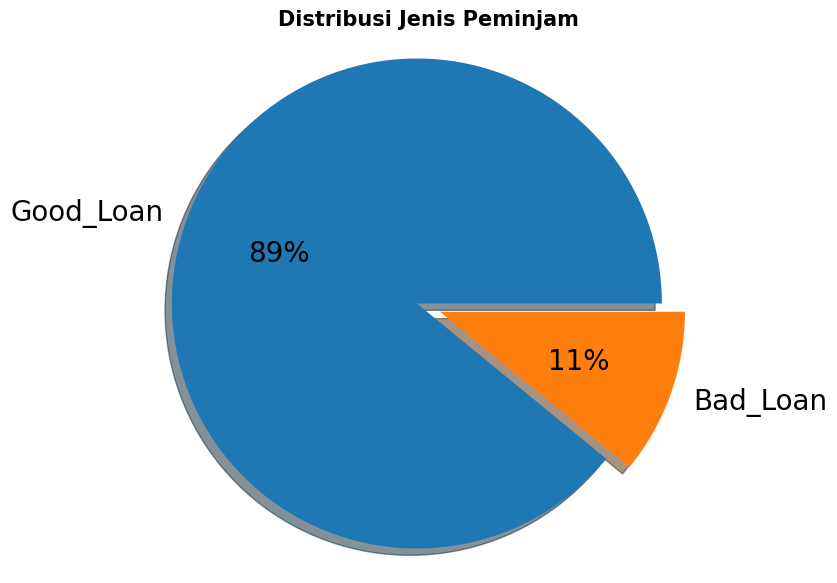

In [62]:
from matplotlib import pyplot as plt
import numpy as np

labels = 'Good_Loan', "Bad_Loan"
sizes = [df.Jenis_Loan[df['Jenis_Loan'] == 1].count(), df.Jenis_Loan[df['Jenis_Loan'] == 0].count()]
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.0f%%', shadow=True, textprops={'fontsize': 20})
ax1.axis('equal')
plt.title("Distribusi Jenis Peminjam",
        fontsize = 15,
        family = 'sans-serif',
        fontweight='bold')
#plt.title("Proporsi pelanggan yang churn dan tidak churn")

plt.show()

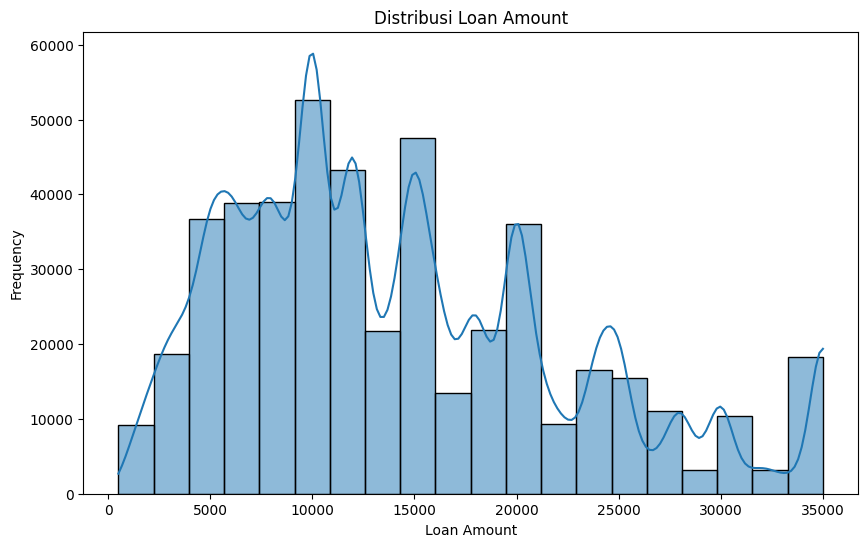

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk distribusi Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=20, kde=True)
plt.title('Distribusi Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

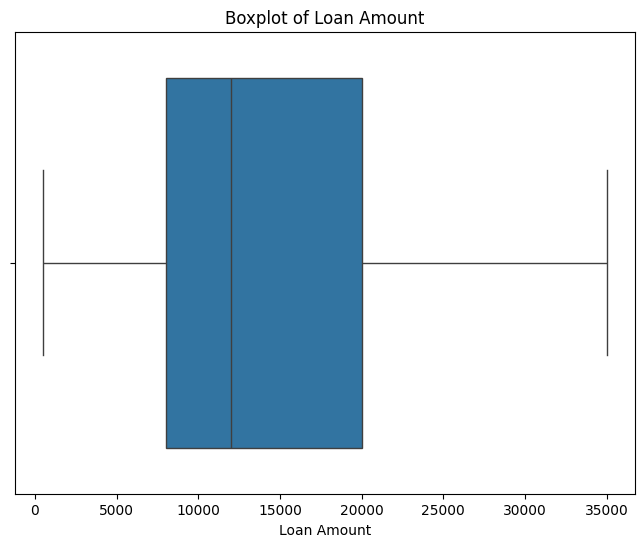

In [64]:
# Boxplot untuk melihat outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['loan_amnt'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

**Analisis Univariat**

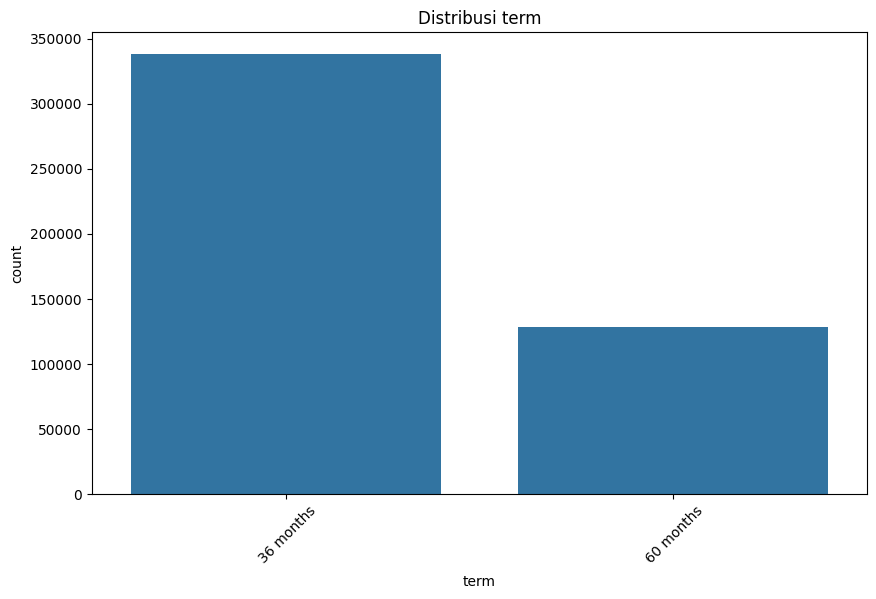

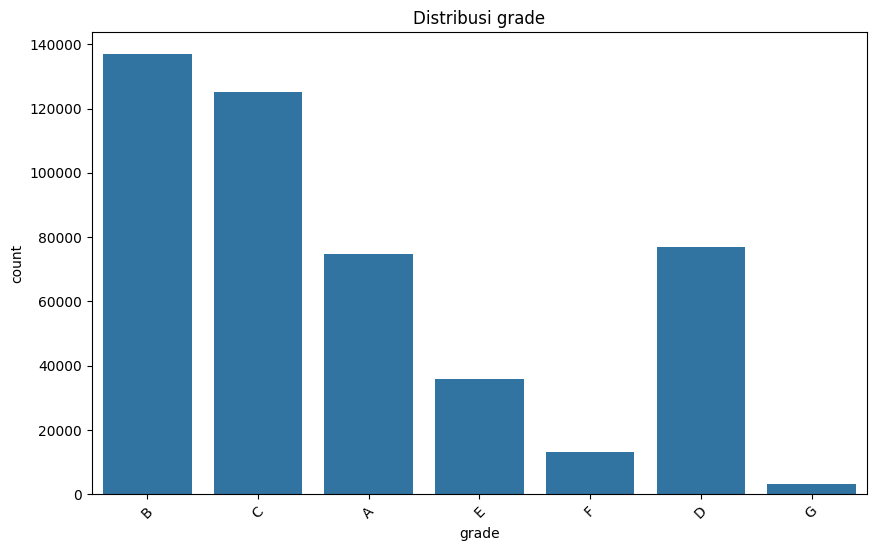

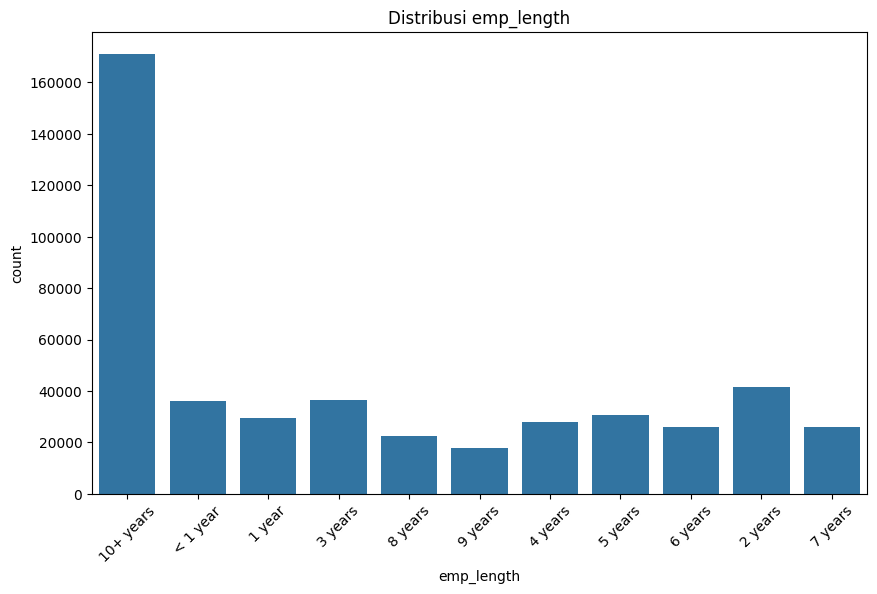

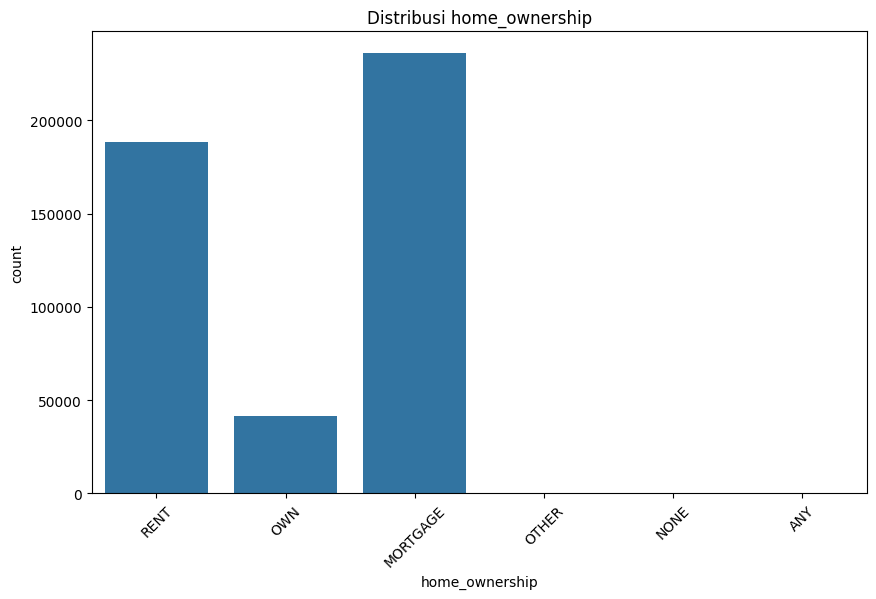

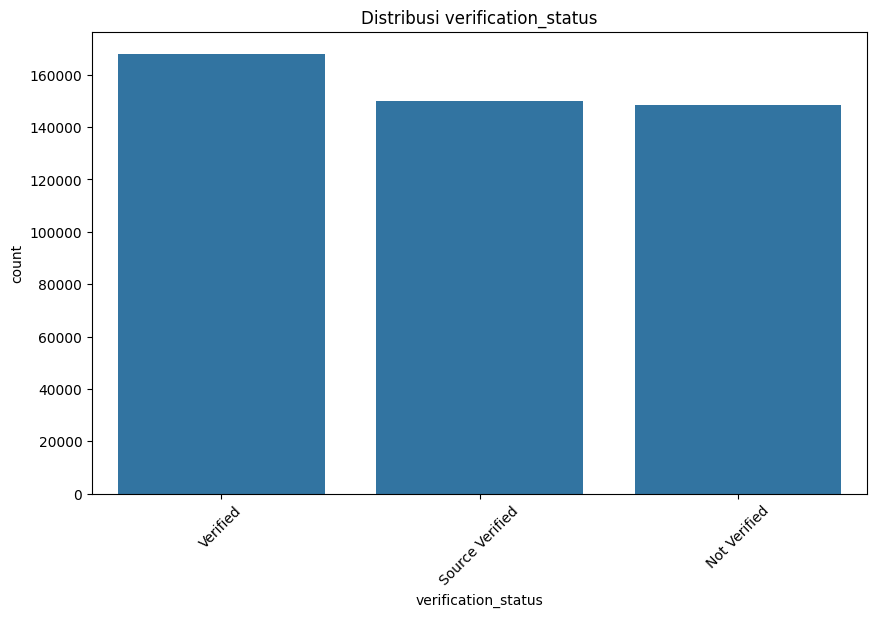

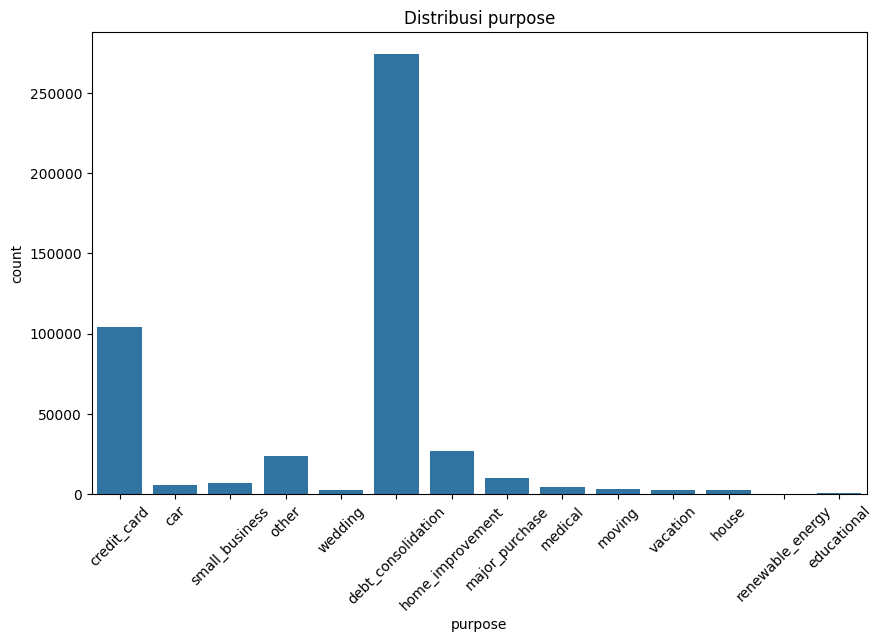

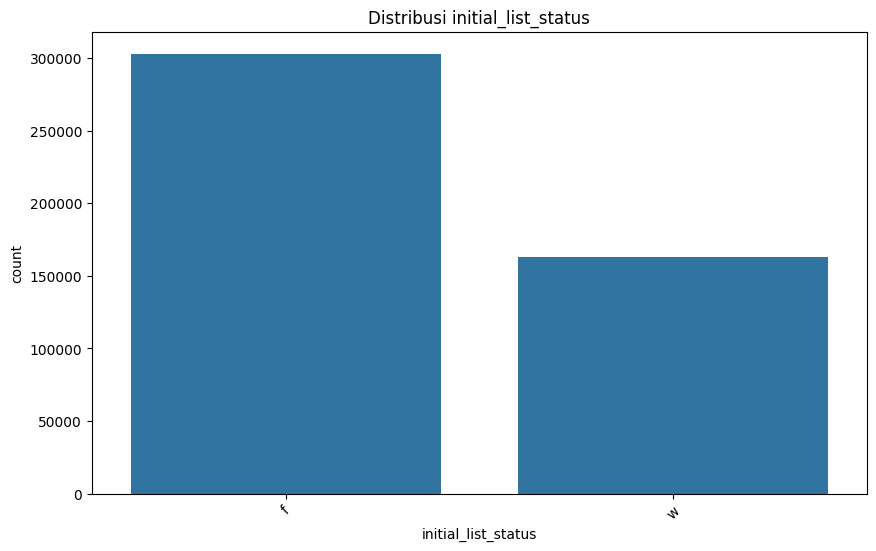

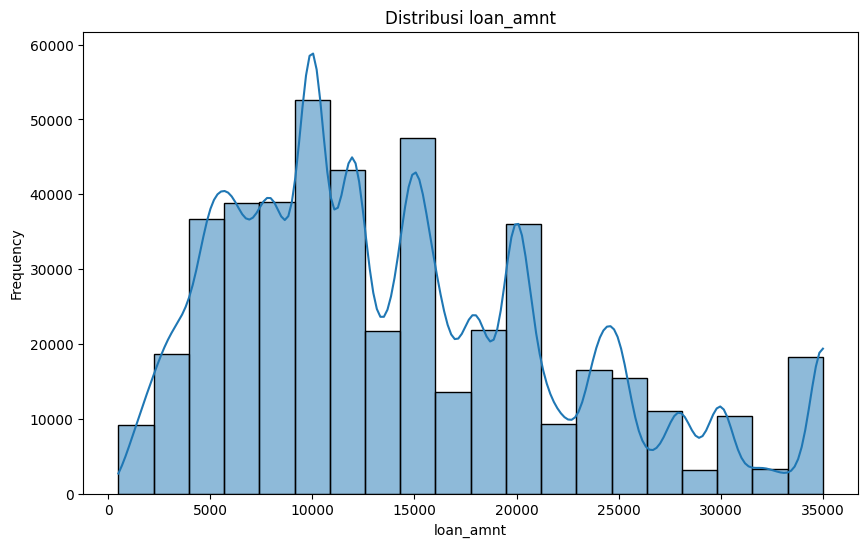

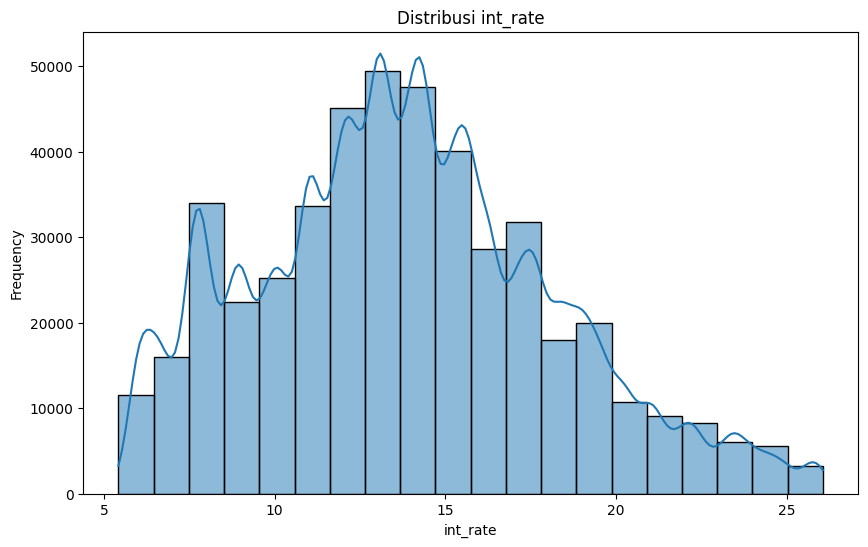

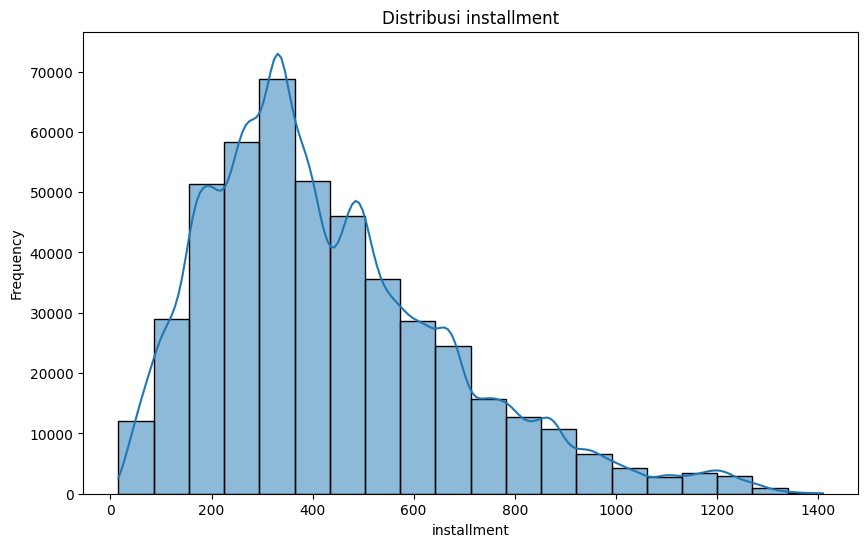

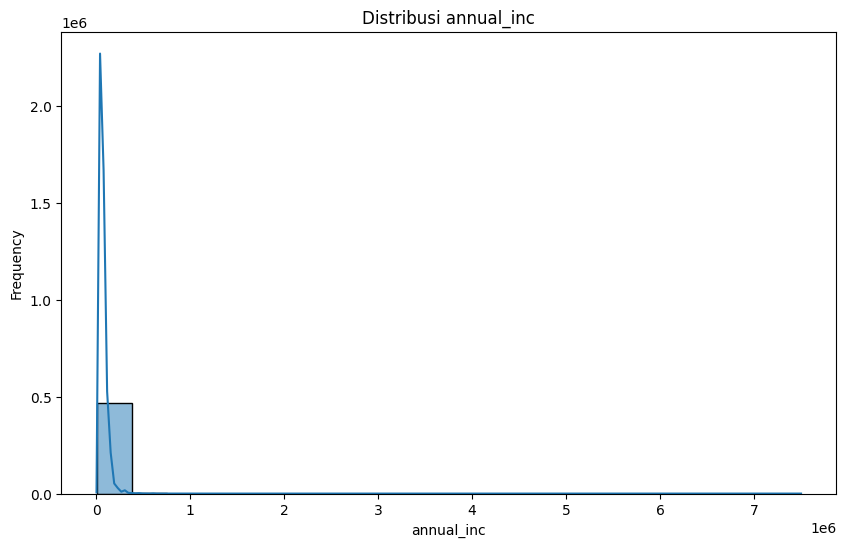

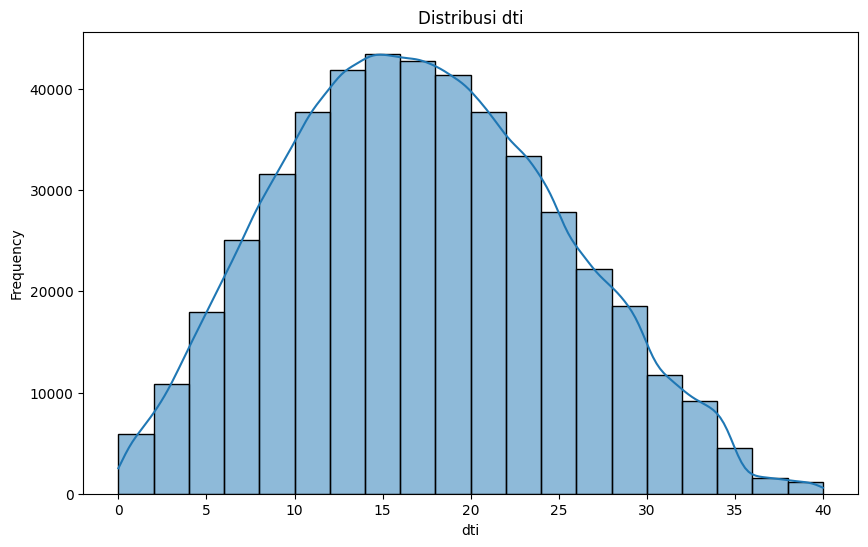

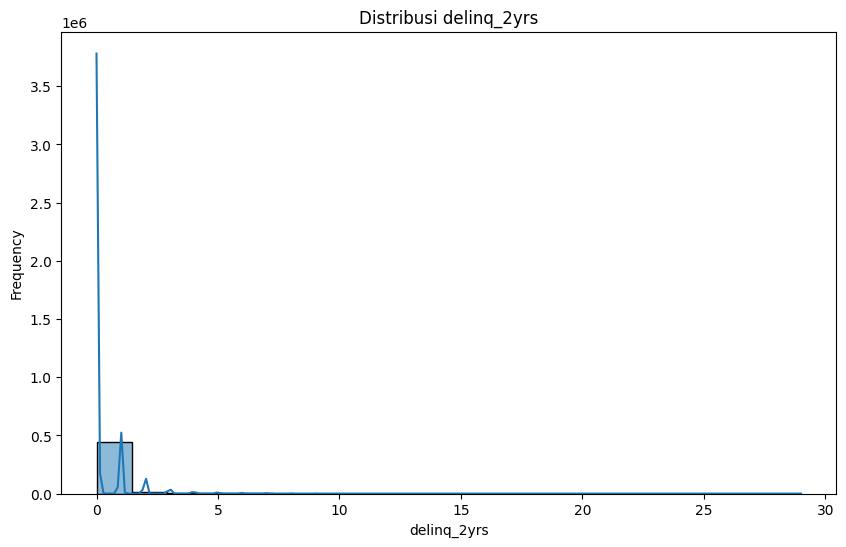

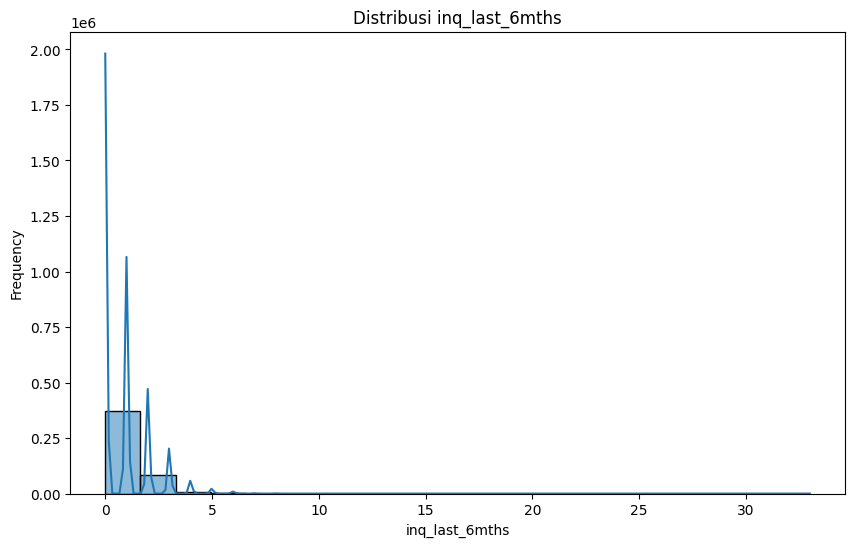

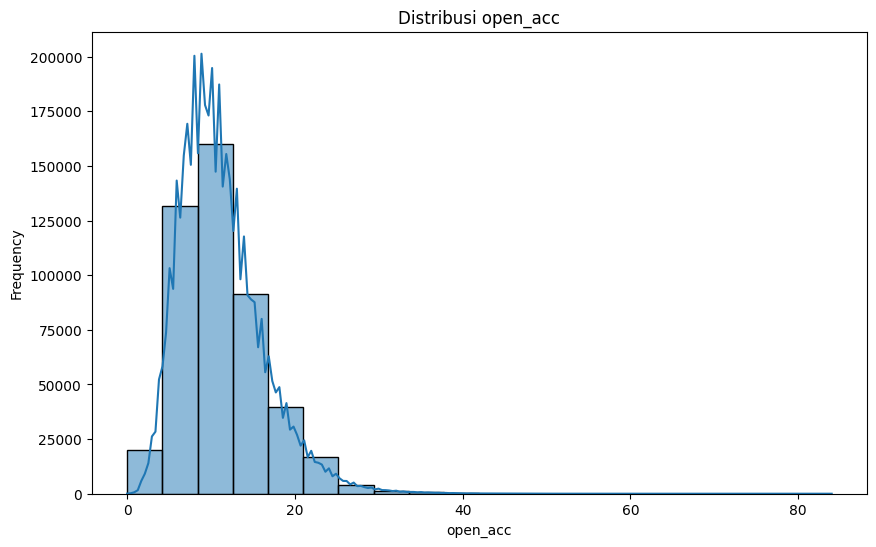

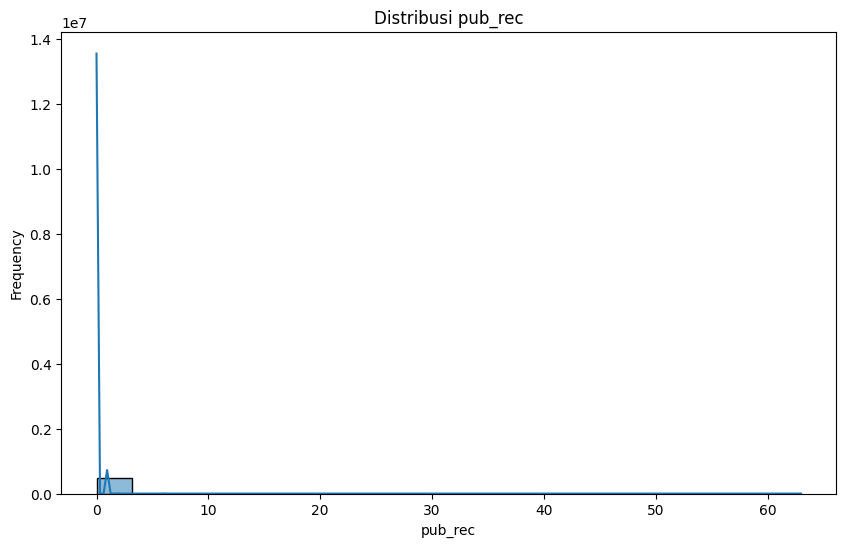

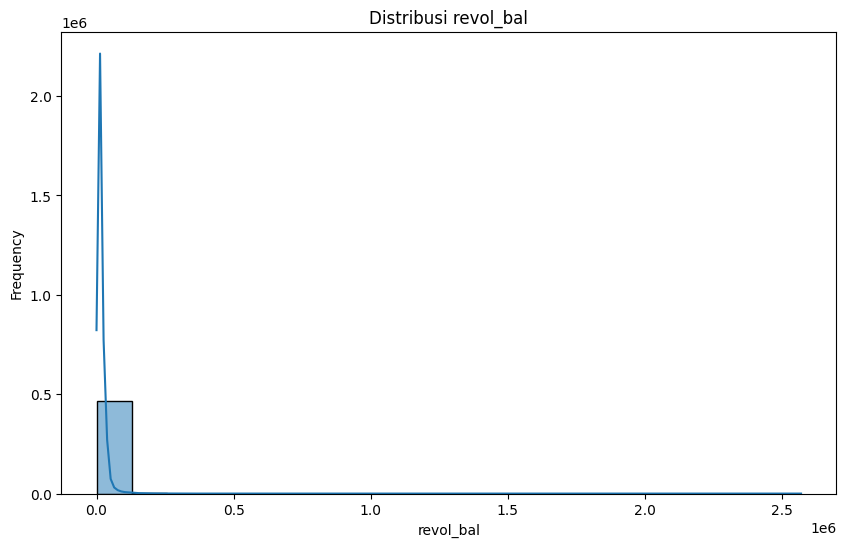

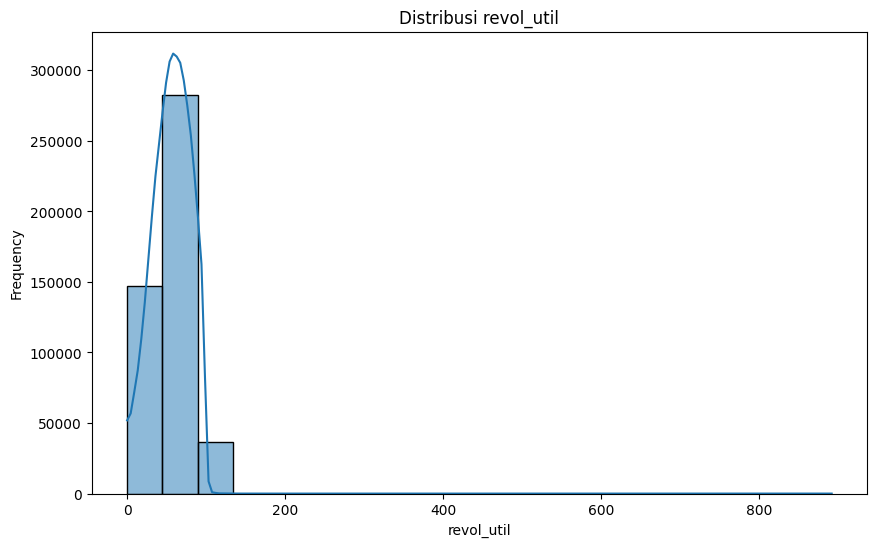

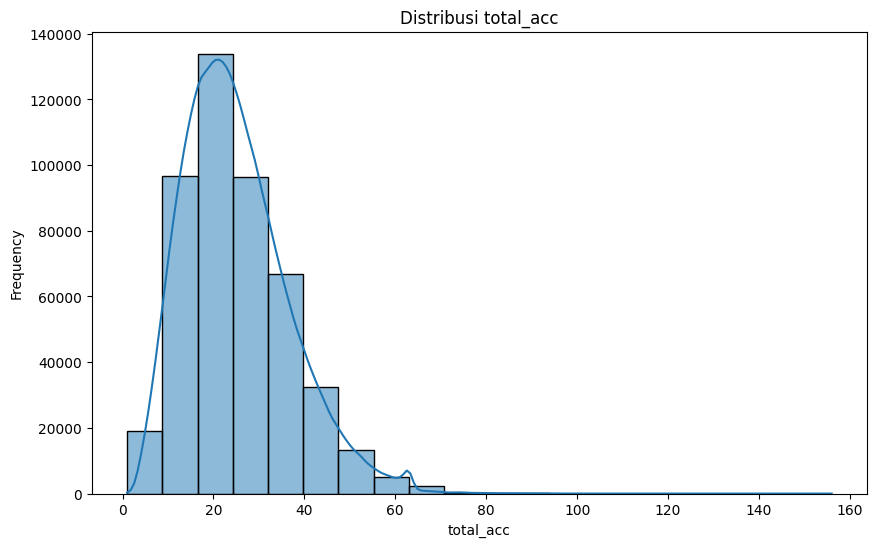

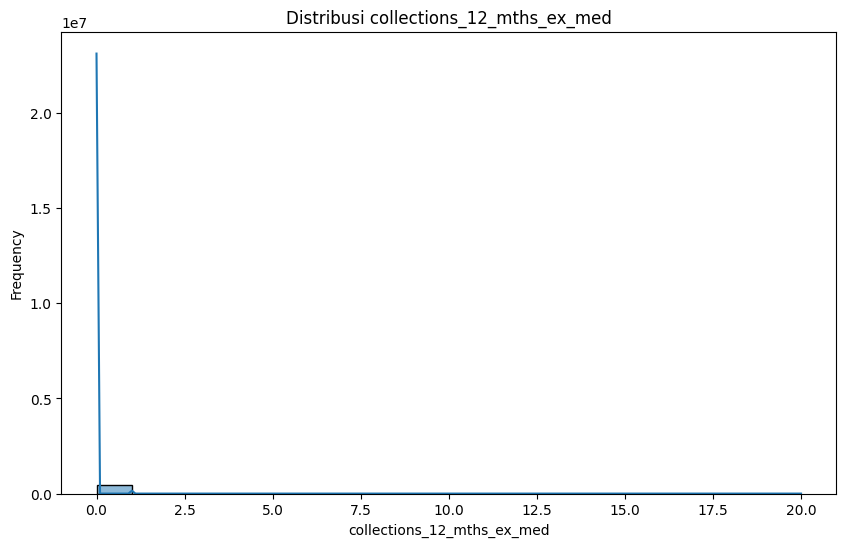

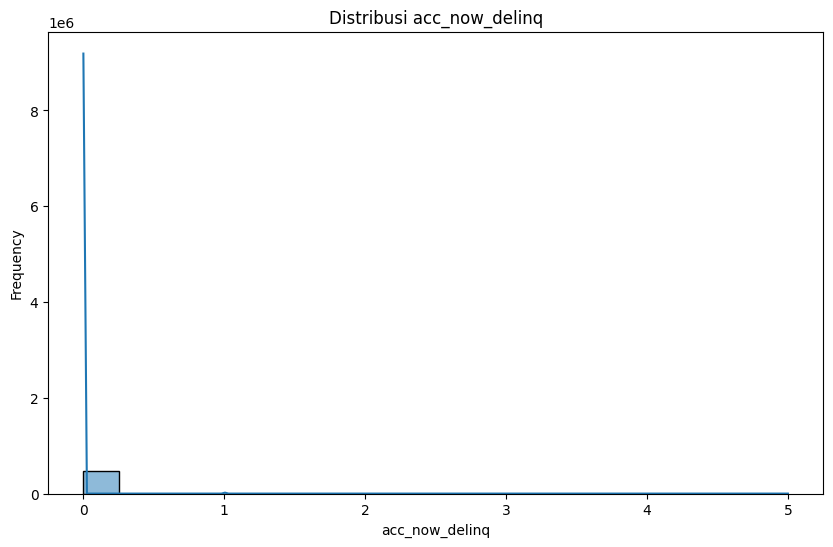

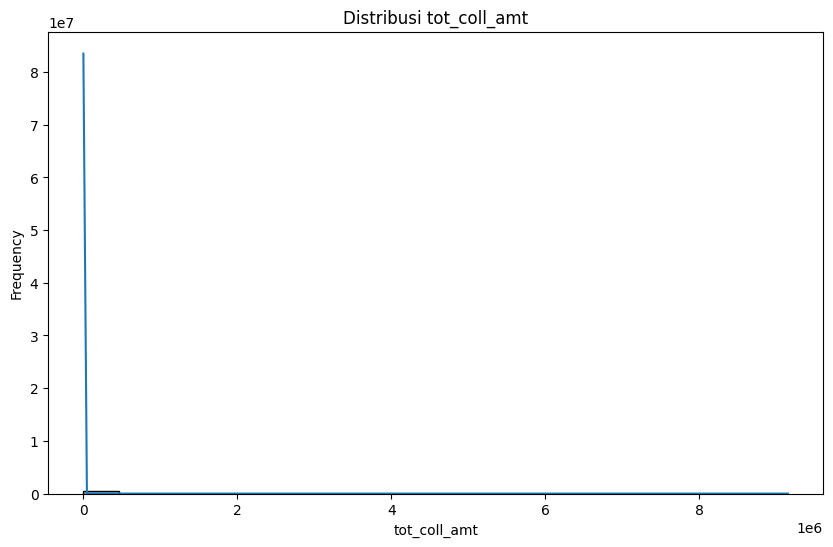

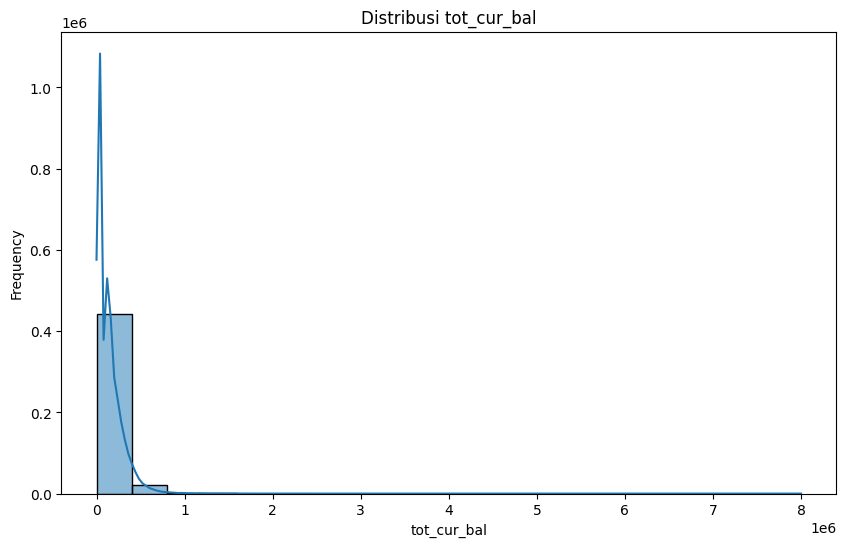

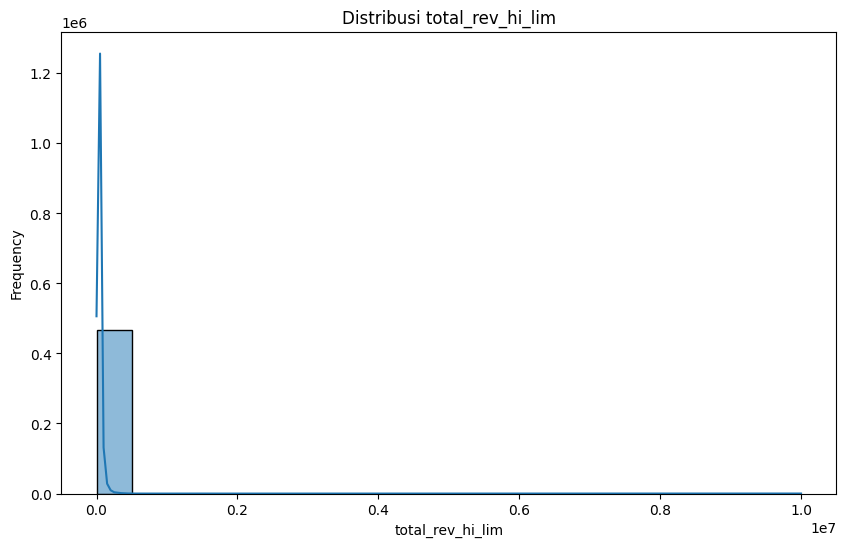

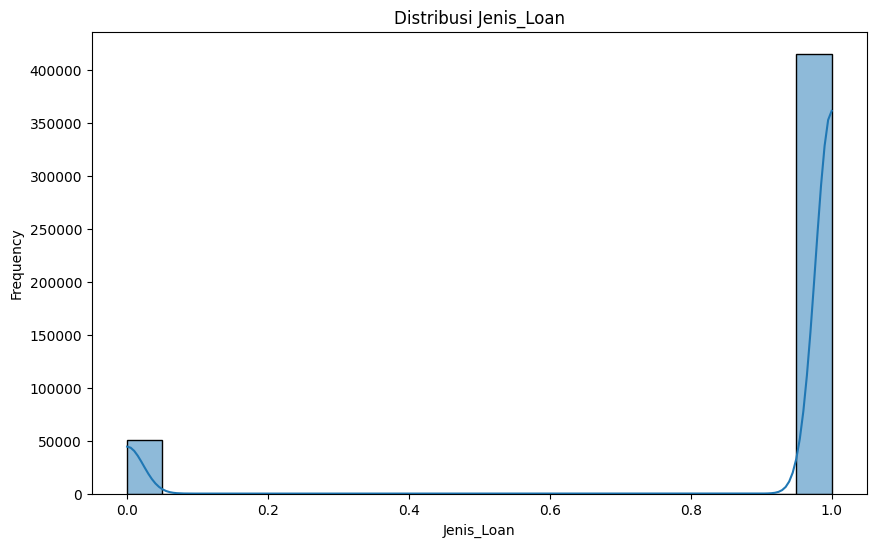

In [65]:

# Variabel Kategorikal
categorical_vars = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
                    'purpose', 'initial_list_status']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_model, x=var)
    plt.title(f'Distribusi {var}')
    plt.xticks(rotation=45)
    plt.show()

# Variabel Numerikal
numeric_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
                'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
                'tot_cur_bal', 'total_rev_hi_lim', 'Jenis_Loan']

for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_model, x=var, bins=20, kde=True)
    plt.title(f'Distribusi {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

**Analisis Bivariat**


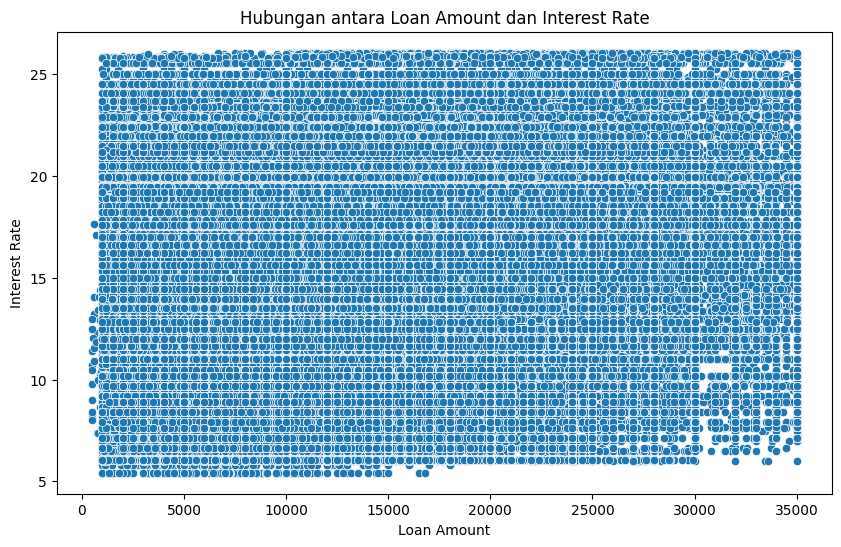

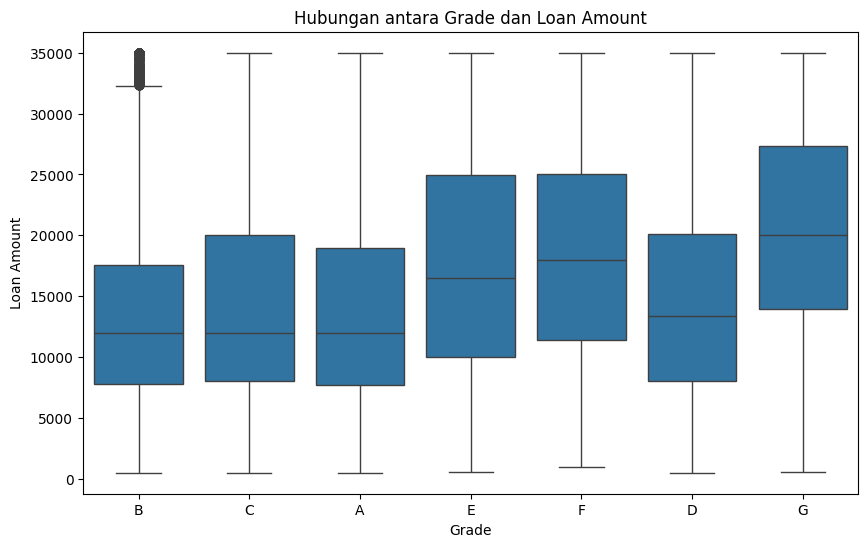

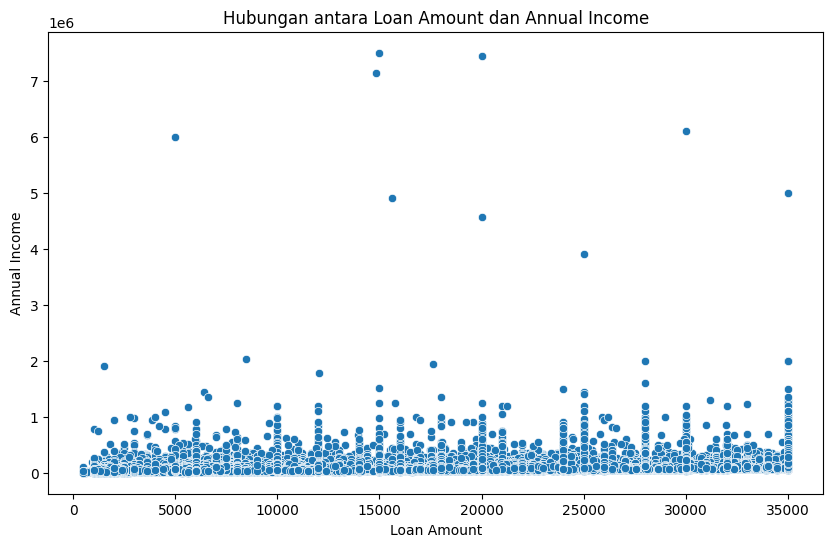

In [66]:
# Analisis Bivariat
# Contoh hubungan antara loan_amnt dan int_rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='loan_amnt', y='int_rate')
plt.title('Hubungan antara Loan Amount dan Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

# Contoh hubungan antara loan_amnt dan grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_model, x='grade', y='loan_amnt')
plt.title('Hubungan antara Grade dan Loan Amount')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

# Contoh hubungan antara loan_amnt dan annual_inc
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='loan_amnt', y='annual_inc')
plt.title('Hubungan antara Loan Amount dan Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.show()

# Data Modelling

Sebelum dilakukan pemodelan, dataset akan melalui proses one hot encoding, di mana fitur/kolom bertipe kategori akan diubah menjadi numerik agar model dapat memahami dataset.

In [67]:
import pandas as pd

# Menggunakan One-Hot Encoding pada DataFrame df_model
df = pd.get_dummies(df_model)

# Mengidentifikasi kolom-kolom yang bertipe boolean
bool_cols = df.select_dtypes(include='bool').columns

# Mengonversi kolom-kolom yang bertipe boolean menjadi integer
df[bool_cols] = df[bool_cols].astype(int)

# Menampilkan DataFrame yang telah diubah
df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,5000,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,...,0,0,0,0,0,0,0,0,1,0
1,2500,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,...,0,0,0,0,0,0,0,0,1,0
2,2400,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,...,0,0,0,0,0,1,0,0,1,0
3,10000,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,...,0,0,0,1,0,0,0,0,1,0
4,3000,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,14.47,432.64,110000.0,19.85,0.0,2.0,18.0,0.0,23208,...,0,0,0,0,0,0,0,0,0,1
466281,22000,19.97,582.50,78000.0,18.45,0.0,5.0,18.0,1.0,18238,...,0,0,0,0,0,0,0,0,1,0
466282,20700,16.99,514.34,46000.0,25.65,0.0,2.0,18.0,0.0,6688,...,0,0,0,0,0,0,0,0,1,0
466283,2000,7.90,62.59,83000.0,5.39,3.0,1.0,21.0,0.0,11404,...,0,0,0,0,0,0,0,0,0,1


**Imbalance Dataset**

Dalam dataset ini, terdapat masalah ketidakseimbangan kelas pada fitur target 'Jenis Loan', di mana terdapat 415.317 sampel dari kelas 'Good Loan' dan hanya 50.968 sampel dari kelas 'Bad Loan'. Untuk meningkatkan kinerja model, diperlukan penyeimbangan data terlebih dahulu. Oleh karena itu, dalam penelitian ini, peneliti menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan dataset.

**SMOTE** adalah salah satu teknik oversampling yang populer dan efektif dalam menangani ketidakseimbangan dataset. Ini menghasilkan sampel sintetis dari kelas minoritas untuk menyamakan jumlah sampel dengan kelas mayoritas, tanpa mengulangi sampel yang ada.

In [68]:
print("Distribusi Variabel Target = \n")

df['Jenis_Loan'].value_counts()

Distribusi Variabel Target = 



Jenis_Loan
1    415317
0     50968
Name: count, dtype: int64

In [69]:
# mendefinisi feature matrix(X) and response vector(y)

X = df.loc[:, df.columns !='Jenis_Loan']
y = df['Jenis_Loan']

In [70]:
# Penggunaan SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print("Sebelum penggunaan SMOTE", counter)
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Oversampling hanya pada dataset pelatihan (X_train dan y_train)
X, y = smote.fit_resample(X, y)
counter = Counter(y)
print("Sebelum penggunaan SMOTE", counter)

Sebelum penggunaan SMOTE Counter({1: 415317, 0: 50968})
Sebelum penggunaan SMOTE Counter({1: 415317, 0: 415317})


In [71]:
# spliting dataset X dan Y menjadi data train 70% dan data test 30%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Buat dan latih model regresi logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Buat prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi: 0.5753610189794555

Confusion Matrix:
[[112927  53045]
 [ 88043  78239]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.68      0.62    165972
           1       0.60      0.47      0.53    166282

    accuracy                           0.58    332254
   macro avg       0.58      0.58      0.57    332254
weighted avg       0.58      0.58      0.57    332254



In [83]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,target_names=['Bad Loan','Good Loan'])

print(f"Akurasi: {accuracy}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Akurasi: 0.937541760219591

Confusion Matrix:
[[145454  20518]
 [   234 166048]]
Classification Report:
              precision    recall  f1-score   support

    Bad Loan       1.00      0.88      0.93    165972
   Good Loan       0.89      1.00      0.94    166282

    accuracy                           0.94    332254
   macro avg       0.94      0.94      0.94    332254
weighted avg       0.94      0.94      0.94    332254



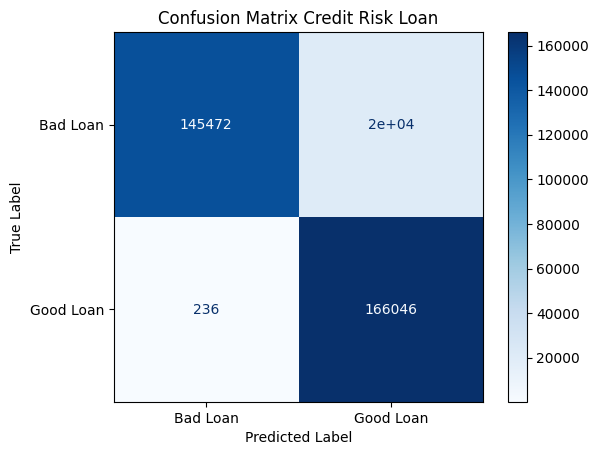

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad Loan', 'Good Loan'])
disp.plot(cmap=plt.cm.Blues)

# Tambahkan judul dan label sumbu
plt.title("Confusion Matrix Credit Risk Loan")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()